In [5]:
import socnet as sn
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
g = sn.load_graph('teste.gml',has_pos=False)

sn.show_graph(g)

g.clear()

In [7]:
def add_node(g):
    maior = 1
    
    if g.nodes():
        maior = max(g.nodes()) + 1
    
    g.add_node(maior)
    g.node[maior]['color'] = (255,255,255)
    g.node[maior]['pos'] = (random.uniform(1.5, 1.9),random.uniform(1.5, 1.9))
    g.node[maior]['experiencia'] = 0
    g.node[maior]['competencia'] = 0
    g.node[maior]['vontade'] = 1
    g.node[maior]['hcomp'] = random.uniform(9, 11)
    g.node[maior]['scomp'] = random.uniform(0.3, 0.7) 
    
def add_edge(g, n, m):
    g.add_edge(n,m)
    g.edges[n,m]['color'] = (0,0,0)

def snapshot(g, frames):
    frame = sn.generate_frame(g)
    frames.append(frame)
    
def sigmoid(t, h, s):
    return h / (1 + math.exp(-s*t+5))

In [41]:
g.clear()
for i in range(10): 
    add_node(g)

In [42]:
tempo = 120

frames = []

number_of_players = []



for t in range(tempo):
    
    removed_node = []
    
    for i in range (random.randint(0,3)):
        add_node(g)
        
    for n in g.nodes():
        if g.node[n]['competencia'] < 3:
            g.node[n]['color'] = (150,0,0)
        elif 3 <= g.node[n]['competencia'] <= 6:
            g.node[n]['color'] = (0,150,0)
        else:
            g.node[n]['color'] = (0,0,150)
    
    
    
    for n in g.nodes():
        similar_comp = []
        
        g.node[n]['competencia'] = sigmoid(g.node[n]['experiencia']+1, g.node[n]['hcomp'], g.node[n]['scomp'])
        g.node[n]['experiencia'] +=1
        
        acceptance_level = 1
        while True:
            for m in g.nodes():
                if g.node[m]['competencia']-acceptance_level <= g.node[n]['competencia'] <= g.node[m]['competencia']+acceptance_level:
                    similar_comp.append(m)
            if len(similar_comp) < 5:
                similar_comp = []
                acceptance_level += 1
            else:
                break
            
        
        
        mates = random.sample(similar_comp, 5)
        for i in mates:
            if g.node[i]['competencia'] > g.node[n]['competencia']+3:
                g.node[n]['vontade'] -= 0.05
            else:
                g.node[n]['vontade'] += 0.05
                
           
        for m in g.nodes():
            if n < m:      
                
                if g.has_edge(n,m):
                    g.remove_edge(n,m)
                
                if g.node[m]['competencia']-0.5 <= g.node[n]['competencia'] <= g.node[m]['competencia']+0.5:
                    if g.node[n]['competencia']-0.5 <= g.node[m]['competencia'] <= g.node[n]['competencia']+0.5:
                        add_edge(g, n, m)
        
        if g.node[n]['vontade'] <= 0.3:
            removed_node.append(n)
    
    for i in removed_node:      
        g.remove_node(i)        
    
    
    number_of_players.append(len(list(g.nodes)))
    

In [43]:
sn.show_graph(g)
list(g.nodes)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

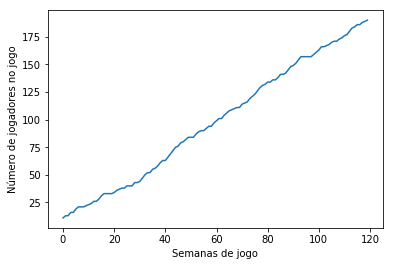

In [45]:
for n in g.nodes():
    #print(len(list(g.neighbors(n))))
    pass

plt.plot(number_of_players)
plt.ylabel("Número de jogadores no jogo")
plt.xlabel("Semanas de jogo")